### 펭귄 종류 예측

In [ ]:
종(species): Adelie, Chinstrap, Gentoo (3종)

섬(island)

부리 길이/깊이(bill length, bill depth)

날개 길이(flipper length)

몸무게(body mass)

성별(sex)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus = False)
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

sex를 제외한 나머지 열의 null값들은 다 drop

In [5]:
df_clean = df.dropna(subset = 'bill_length_mm')
print(df_clean.isnull().sum())
df_clean["sex"].fillna(df_clean["sex"].mode()[0],inplace=True)
df_clean.head()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<Axes: xlabel='island', ylabel='count'>

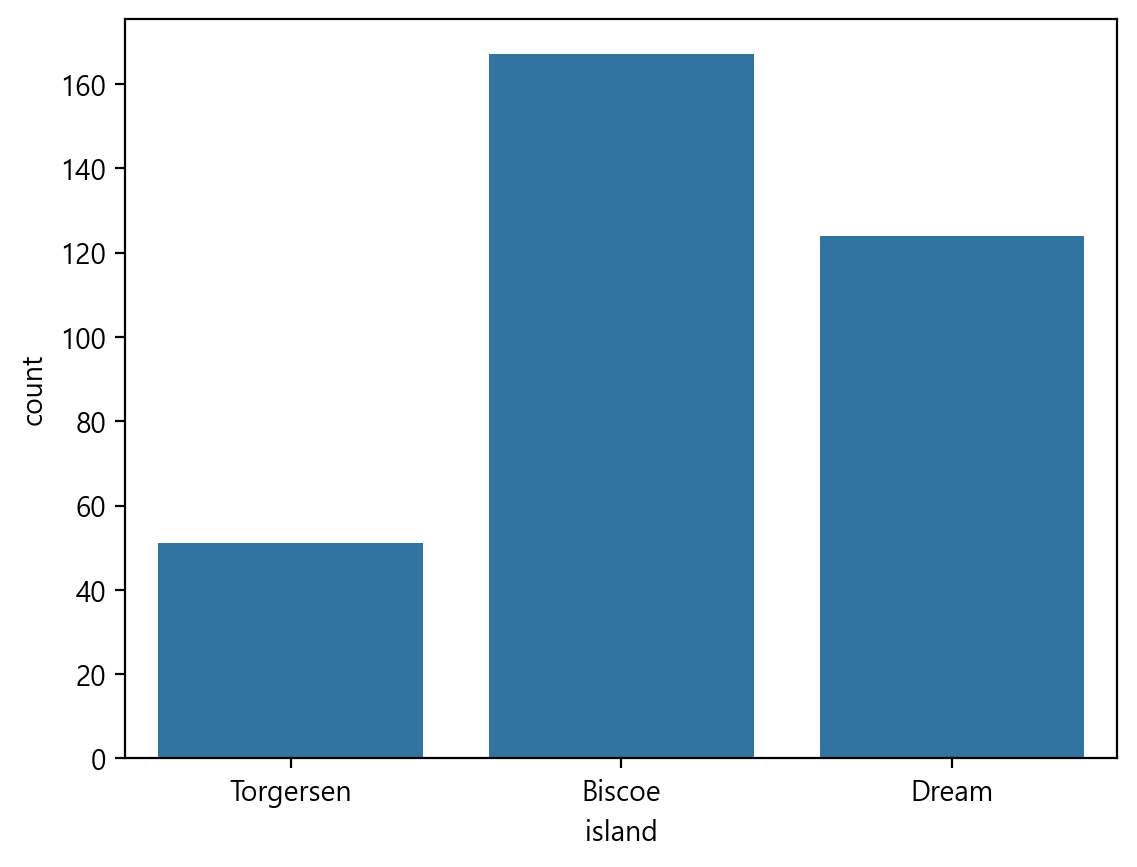

In [6]:
sns.countplot(x='island',data = df_clean)

<Axes: xlabel='species', ylabel='count'>

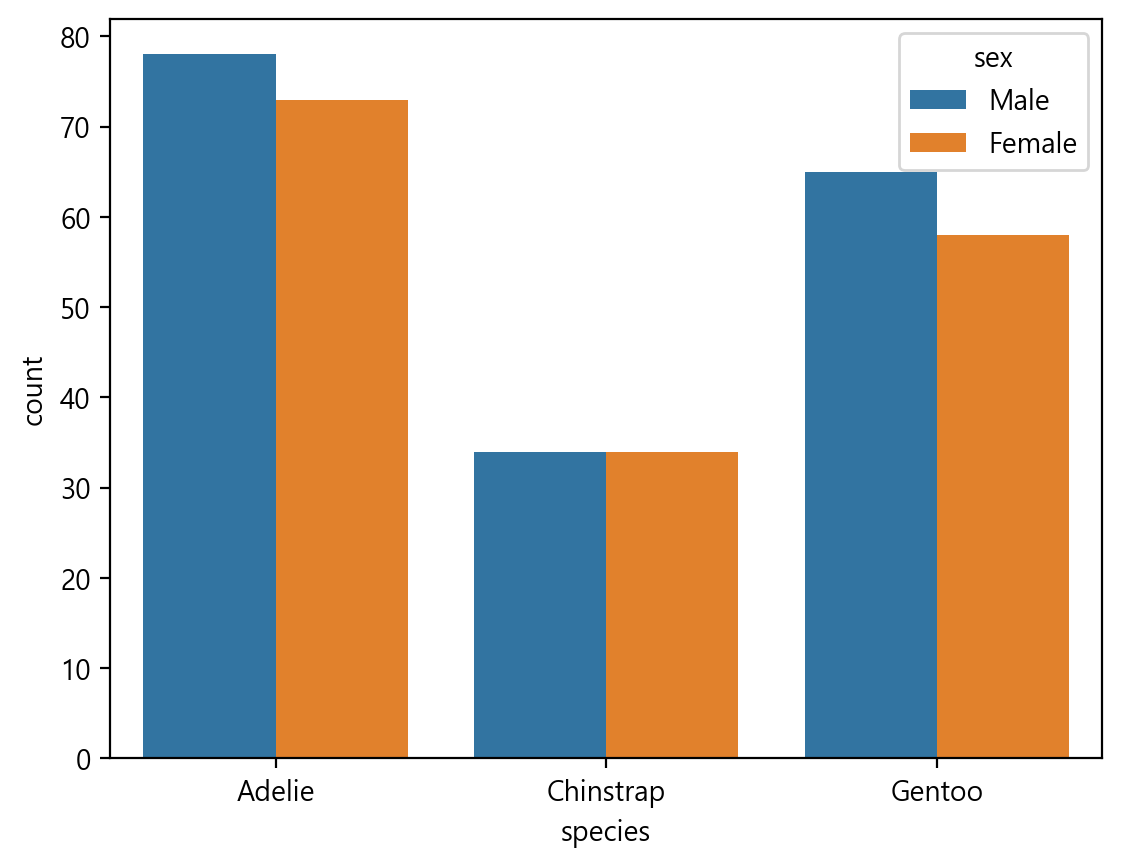

In [7]:
# 3개의 종 모두 남여 고르게 분포한다.
sns.countplot(x='species',hue='sex',data=df_clean)

<Axes: xlabel='species', ylabel='count'>

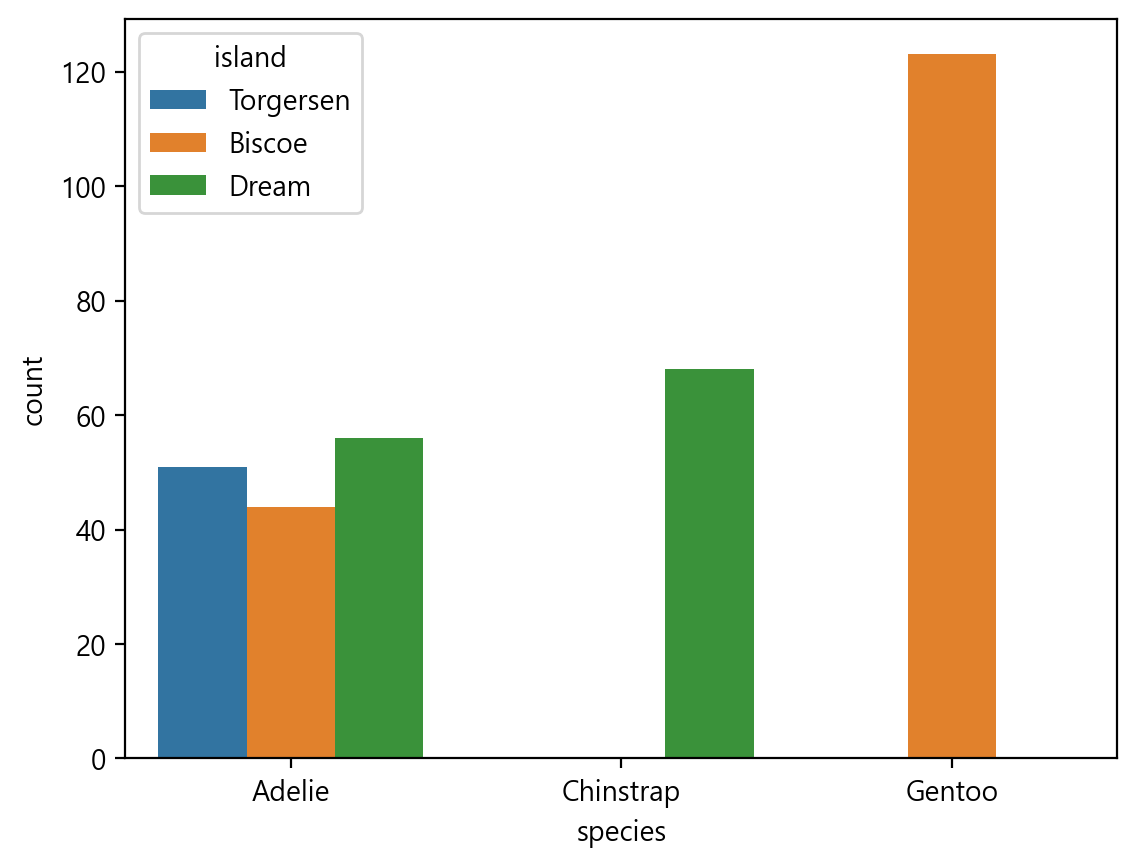

In [8]:
# 섬에 따른 종류를 시각화
# 섬에 따라 사는 종들이 다르다는 걸 알 수 있다. >> 분류에 활용 가능
sns.countplot(x="species",hue="island",data=df_clean)

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

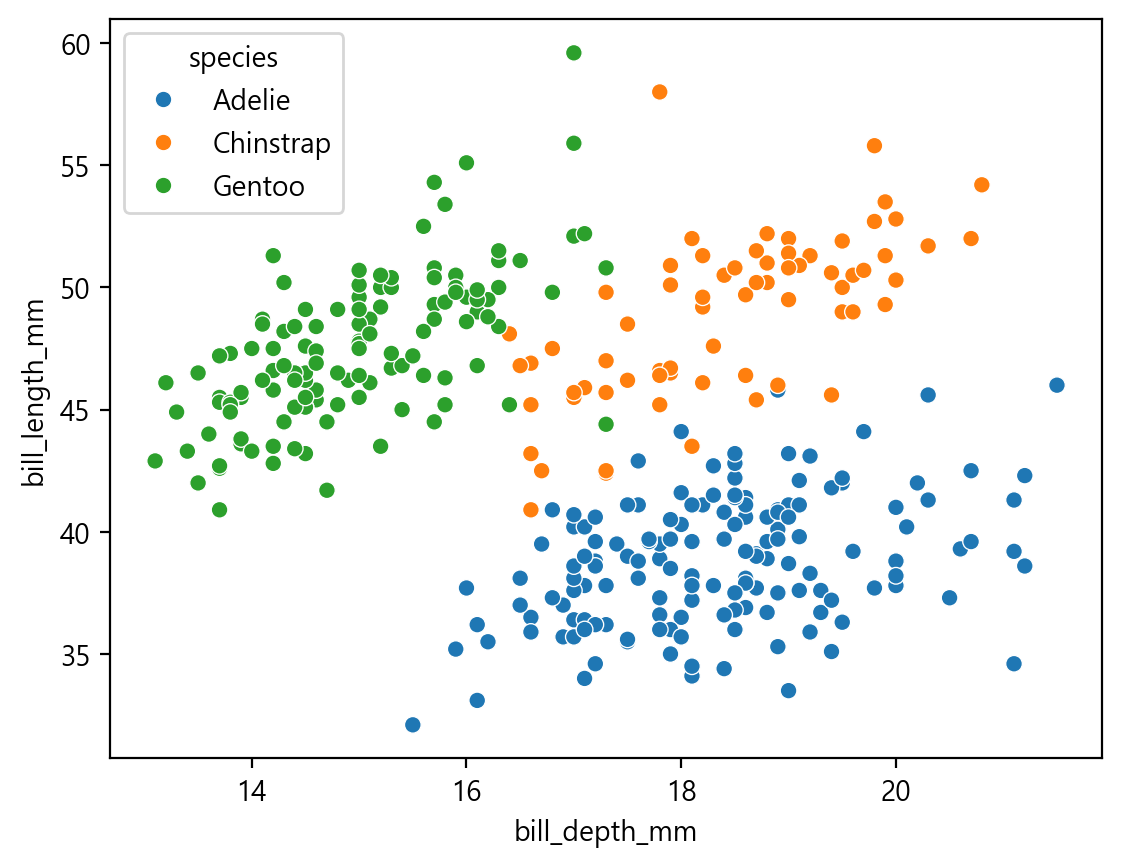

In [9]:
# 부리 길이/깊이 에 따른 종류 분류
# 부리 길이와 깊이를 기준으로 산점도를 그린 결과, 세 종의 펭귄은 뚜렷한 군집을 형성하였다. 
# 특히 Adelie는 짧고 깊은 부리, Gentoo는 길고 얕은 부리, Chinstrap은 길고 중간 정도 깊이의 부리 특성을 보여 구분이 가능하다.
# 이러한 특성으로 보아, 단 두 변수만으로도 분류 모델(KNN 등)을 적용하면 높은 정확도의 종 예측이 가능할 것으로 보인다.
sns.scatterplot(data=df_clean , y='bill_length_mm',x='bill_depth_mm',hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

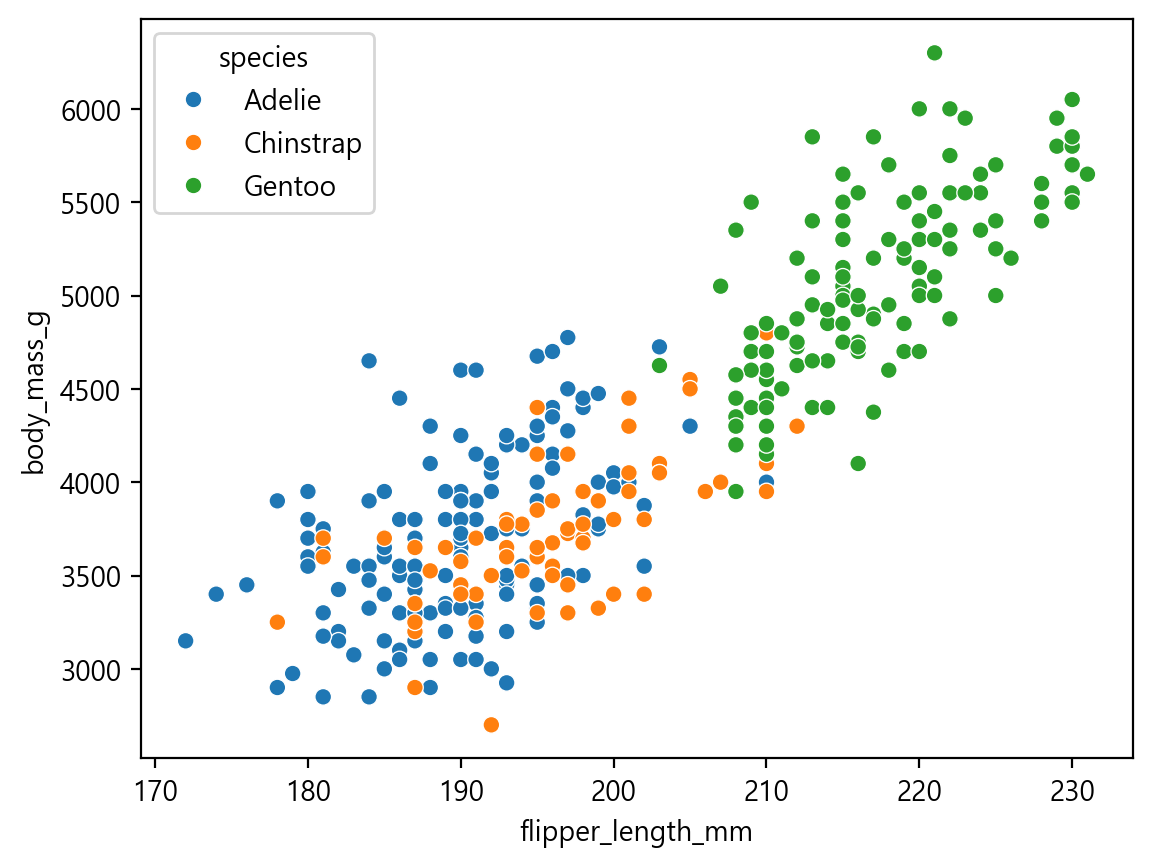

In [10]:
# Gentoo는 무게가 많이 나가고 날개가 긴 쪽에 속하여 다른 종에 비해 뚜렷한 특징을 가진 걸 볼 수 있다.
# Adelie,Chinstrap 은 몸무게와 날개길이 보다는 부리길이,부리깊이 와 관련이있다.
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',hue='species',data=df_clean)

<Axes: >

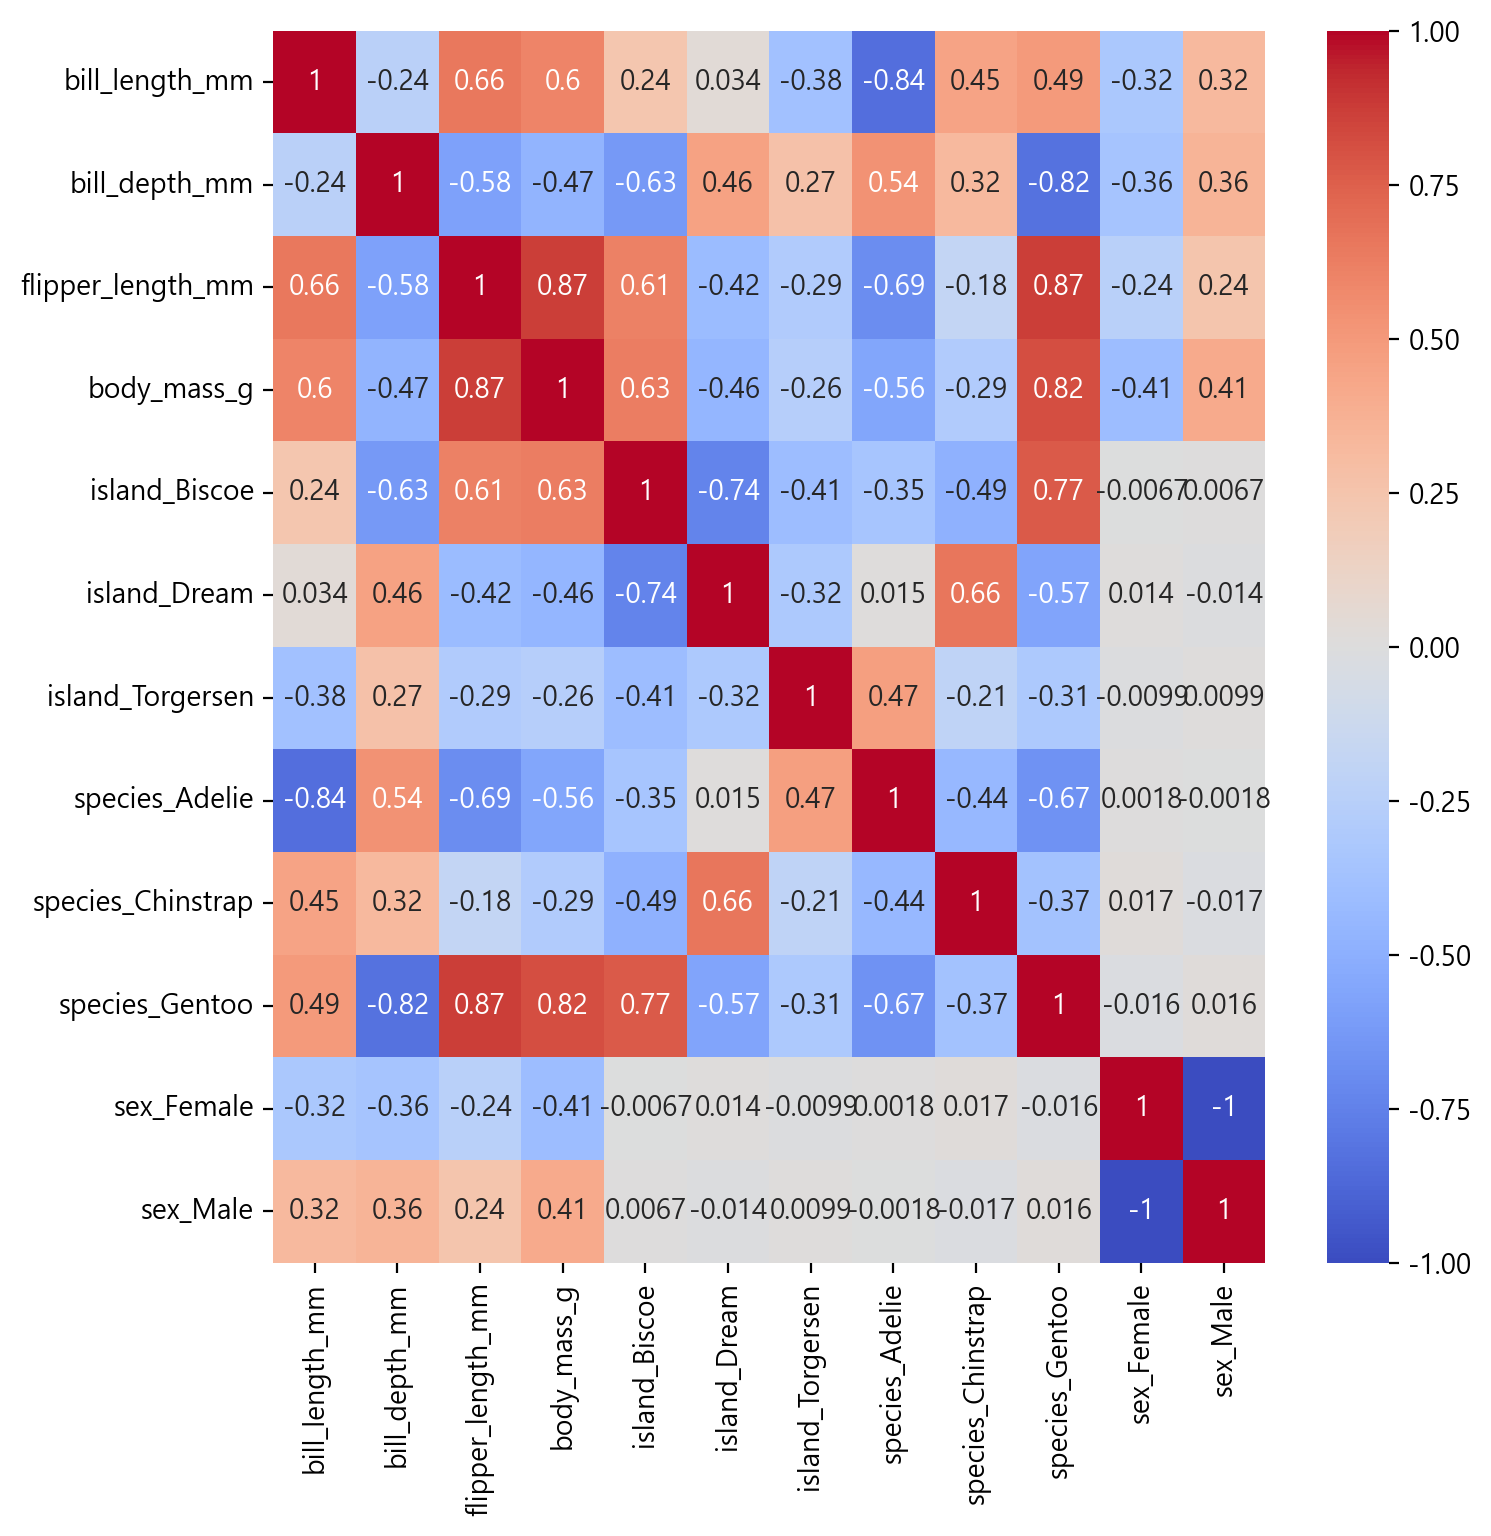

In [17]:
plt.figure(figsize=(8,8))
df_dum = pd.get_dummies(df_clean, columns=['island', 'species', 'sex'], drop_first=False)
sns.heatmap(df_dum.corr(), annot=True,cmap='coolwarm')

In [54]:
df_n = df_clean[['species', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].copy()
df_n['species'] = df_n['species'].map({"Adelie":0,"Chinstrap":1,"Gentoo":2})
df_n.corr()['species'].sort_values()

bill_depth_mm       -0.744076
bill_length_mm       0.731369
body_mass_g          0.750491
flipper_length_mm    0.854307
species              1.000000
Name: species, dtype: float64

### 예측 모델링

펭귄 데이터셋의 EDA 결과, flipper_length_mm과 bill_length_mm 두 변수만으로도 종(species) 간의 분포가 뚜렷하게 구분되는 것을 확인할 수 있었다.
따라서 복잡한 모델보다는 결정 경계가 단순한 KNN 알고리즘을 적용하는 것이 적합하다고 판단하였다.

In [11]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# X(독립변수), y(종속변수)
X = df_clean[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = df_clean["species"]

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (KNN은 거리 기반 → 스케일링 필수!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 모델 학습 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9855072463768116
Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        35
   Chinstrap       0.92      1.00      0.96        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

